#  Video Game Sales

My project is based on the data given by kaggle on the sales of the video game. Video games have been part of everyone's life since the childhood so it would be interesting to know what similarities or differences we have with others in terms of the games we like. In this project I have used all the knowledge which I learnt from the course. I have used pandas, numpy,matplotlib, seaborn libraries in completely analysing the data. 

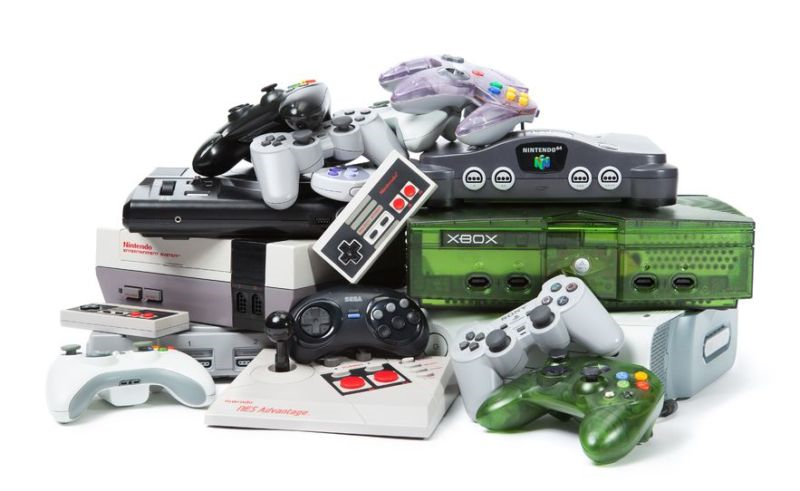



## Downloading the Dataset

We have to download our preferred dataset from the website directly into our notebook by using the opendatasets library 

In [1]:
!pip install jovian opendatasets --upgrade --quiet

Let's begin by downloading the data, and listing the files within the dataset.

In [2]:
dataset_url = 'https://www.kaggle.com/gregorut/videogamesales' 

In [3]:
import opendatasets as od
od.download(dataset_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: gsaketh21
Your Kaggle Key: ········


100%|██████████| 381k/381k [00:00<00:00, 16.2MB/s]

The dataset has been downloaded and extracted.

In [4]:
data_dir = './videogamesales'

In [5]:
import os
os.listdir(data_dir)

['vgsales.csv']

Let us save and upload our work to Jovian before continuing.

In [6]:
project_name = "video game sales" 

In [7]:
!pip install jovian --upgrade -q

In [8]:
import jovian

In [9]:
jovian.commit(project=project_name, files=['vgsales.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sakethgudi/video-game-sales" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/sakethgudi/video-game-sales


'https://jovian.ai/sakethgudi/video-game-sales'

## Loading the file

In the first step of our analysis, we load the dataset file into our dataframe using the 'read' command. Then we start the basic observations of the data and cleaning.



In [10]:
# importing all the basic libraries into the notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
vgs_df=pd.read_csv('vgsales.csv')

## Analysing the dataset


In [12]:
vgs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [13]:
vgs_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [14]:
vgs_df.shape

(16598, 11)

In [15]:
vgs_df.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

In [16]:
vgs_df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [17]:
vgs_df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [18]:
vgs_df.tail(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.0,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01


In [19]:
vgs_df.loc[1:25]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76


In [20]:
vgs_df.Global_Sales.mean()

0.53744065550074

In [21]:
vgs_df.groupby('Platform')[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']].sum()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
2600,90.60,5.47,0.00,0.91,97.08
3DO,0.00,0.00,0.10,0.00,0.10
3DS,78.87,58.52,97.35,12.63,247.46
DC,5.43,1.69,8.56,0.27,15.97
DS,390.71,194.65,175.57,60.53,822.49
GB,114.32,47.82,85.12,8.20,255.45
GBA,187.54,75.25,47.33,7.73,318.50
GC,133.46,38.71,21.58,5.18,199.36
GEN,19.27,5.52,2.67,0.89,28.36


In [22]:
vgs2_df=vgs_df.groupby('Platform')[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']].sum()
vgs2_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
2600,90.60,5.47,0.00,0.91,97.08
3DO,0.00,0.00,0.10,0.00,0.10
3DS,78.87,58.52,97.35,12.63,247.46
DC,5.43,1.69,8.56,0.27,15.97
DS,390.71,194.65,175.57,60.53,822.49
GB,114.32,47.82,85.12,8.20,255.45
GBA,187.54,75.25,47.33,7.73,318.50
GC,133.46,38.71,21.58,5.18,199.36
GEN,19.27,5.52,2.67,0.89,28.36


In [23]:
vgs2_df.shape

(31, 5)

In [24]:
vgs2_df.sort_values('Global_Sales', ascending= False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Platform,,,,,
PS2,583.84,339.29,139.20,193.44,1255.64
X360,601.05,280.58,12.43,85.54,979.96
PS3,392.26,343.71,79.99,141.93,957.84
Wii,507.71,268.38,69.35,80.61,926.71
DS,390.71,194.65,175.57,60.53,822.49
PS,336.51,213.60,139.82,40.91,730.66
GBA,187.54,75.25,47.33,7.73,318.50
PSP,108.99,68.25,76.79,42.19,296.28
PS4,96.80,123.70,14.30,43.36,278.10


In [25]:
vgs_df.groupby('Publisher').sum()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,,,
10TACLE Studios,42192,6020.0,0.07,0.04,0.00,0.00,0.11
1C Company,43237,6031.0,0.01,0.07,0.00,0.02,0.10
20th Century Fox Video Games,27266,9907.0,1.82,0.10,0.00,0.01,1.94
2D Boy,14013,2008.0,0.00,0.03,0.00,0.01,0.04
3DO,289344,72018.0,6.48,3.04,0.00,0.63,10.12
...,...,...,...,...,...,...,...
id Software,14602,1992.0,0.02,0.00,0.00,0.00,0.03
imageepoch Inc.,30688,4028.0,0.00,0.00,0.04,0.00,0.04
inXile Entertainment,10758,2015.0,0.02,0.06,0.00,0.01,0.10


In the above cell we can see that out of all the platforms, globally in the market the PS2 has the most sales and the PCFX has the least sales.

In [26]:
vgs3_df=vgs_df.groupby('Publisher')[['NA_Sales', 'EU_Sales','JP_Sales','Other_Sales', 'Global_Sales']].sum()
vgs3_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
10TACLE Studios,0.07,0.04,0.00,0.00,0.11
1C Company,0.01,0.07,0.00,0.02,0.10
20th Century Fox Video Games,1.82,0.10,0.00,0.01,1.94
2D Boy,0.00,0.03,0.00,0.01,0.04
3DO,6.48,3.04,0.00,0.63,10.12
...,...,...,...,...,...
id Software,0.02,0.00,0.00,0.00,0.03
imageepoch Inc.,0.00,0.00,0.04,0.00,0.04
inXile Entertainment,0.02,0.06,0.00,0.01,0.10


In [27]:
vgs3_df.sort_values("Global_Sales", ascending= False)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Publisher,,,,,
Nintendo,816.87,418.74,455.42,95.33,1786.56
Electronic Arts,595.07,371.27,14.04,129.77,1110.32
Activision,429.70,215.53,6.54,75.34,727.46
Sony Computer Entertainment,265.22,187.72,74.10,80.45,607.50
Ubisoft,253.43,163.32,7.50,50.26,474.72
...,...,...,...,...,...
Ongakukan,0.00,0.00,0.01,0.00,0.01
Commseed,0.00,0.00,0.01,0.00,0.01
Takuyo,0.00,0.00,0.01,0.00,0.01


From he above data we can see that Nintendo has backed more sales globally than the other companies, and Naxat Soft has thee least sales overall.

#  Cleaning the datasheet

In [28]:
vgs_df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

We can see that the columns "year" and the "publisher" have some null values, if we can remove those values all our analysing and visualisation becomes far too easy.

In [29]:
#finding where there are NaN values in the giver datasheet 
vgs_df[vgs_df.Year.isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
179,180,Madden NFL 2004,PS2,NaN,Sports,Electronic Arts,4.26,0.26,0.01,0.71,5.23
377,378,FIFA Soccer 2004,PS2,NaN,Sports,Electronic Arts,0.59,2.36,0.04,0.51,3.49
431,432,LEGO Batman: The Videogame,Wii,NaN,Action,Warner Bros. Interactive Entertainment,1.86,1.02,0.00,0.29,3.17
470,471,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,NaN,1.57,1.02,0.00,0.41,3.00
607,608,Space Invaders,2600,NaN,Shooter,Atari,2.36,0.14,0.00,0.03,2.53
...,...,...,...,...,...,...,...,...,...,...,...
16307,16310,Freaky Flyers,GC,NaN,Racing,Unknown,0.01,0.00,0.00,0.00,0.01
16327,16330,Inversion,PC,NaN,Shooter,Namco Bandai Games,0.01,0.00,0.00,0.00,0.01
16366,16369,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,Unknown,0.01,0.00,0.00,0.00,0.01
16427,16430,Virtua Quest,GC,NaN,Role-Playing,Unknown,0.01,0.00,0.00,0.00,0.01


In [30]:
vgs_df['Year'].replace(np.NaN,'Unknown',inplace=True)

In [31]:
#now we have to replace the publisher which have the null values to unknown
vgs_df['Publisher'].replace(np.NaN,'Unknown',inplace=True)

In [32]:
vgs_df[vgs_df.Year.isna()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales


As you can see above the null values have been replaced by some values in the datasheet there are no null values in the datasheet.

In [33]:
vgs_df['fraction_sales_from_NA']= vgs_df.NA_Sales/ vgs_df.Global_Sales

In [34]:
vgs_df['fraction_sales_from_EU']= vgs_df.EU_Sales/ vgs_df.Global_Sales

In [35]:
vgs_df['fraction_sales_from_japan']= vgs_df.JP_Sales/ vgs_df.Global_Sales

In [36]:
vgs_df['fraction_sales_from_others']= vgs_df.Other_Sales/ vgs_df.Global_Sales

In [37]:
vgs_df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,fraction_sales_from_NA,fraction_sales_from_EU,fraction_sales_from_japan,fraction_sales_from_others
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74,0.501450,0.350737,0.045564,0.102248
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,0.722664,0.088966,0.169235,0.019135
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82,0.442490,0.359576,0.105807,0.092406
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00,0.477273,0.333636,0.099394,0.089697
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,0.359260,0.283392,0.325789,0.031878
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01,1.000000,0.000000,0.000000,0.000000
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01,1.000000,0.000000,0.000000,0.000000
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01,0.000000,0.000000,0.000000,0.000000
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01,0.000000,1.000000,0.000000,0.000000


In [38]:
vgs_df.sort_values('fraction_sales_from_NA', ascending= False )

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,fraction_sales_from_NA,fraction_sales_from_EU,fraction_sales_from_japan,fraction_sales_from_others
16597,16600,Spirits & Spells,GBA,2003,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,1.0,0.000000,0.000000,0.000000
12983,12985,Pony Friends: Mini Breeds Edition,DS,2008,Simulation,Eidos Interactive,0.05,0.00,0.00,0.00,0.05,1.0,0.000000,0.000000,0.000000
13074,13076,Sam & Max: Beyond Time and Space,Wii,2010,Adventure,Atari,0.05,0.00,0.00,0.00,0.05,1.0,0.000000,0.000000,0.000000
13071,13073,Over the Hedge: Hammy Goes Nuts!,PSP,2006,Platform,Activision,0.05,0.00,0.00,0.00,0.05,1.0,0.000000,0.000000,0.000000
13069,13071,Kids Learn Music A+ Edition,DS,2011,Misc,Unknown,0.05,0.00,0.00,0.00,0.05,1.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12217,12219,Parlor! Mini 2,SNES,1996,Misc,Nippon Telenet,0.00,0.00,0.07,0.00,0.07,0.0,0.000000,1.000000,0.000000
12216,12218,One Piece: Unlimited World Red,WiiU,2014,Action,Namco Bandai Games,0.00,0.04,0.02,0.00,0.07,0.0,0.571429,0.285714,0.000000
12211,12213,MotorStorm RC,PSV,2012,Racing,Sony Computer Entertainment,0.00,0.05,0.00,0.02,0.07,0.0,0.714286,0.000000,0.285714
12209,12211,Yoake Yori Ruriiro na: Brighter than Dawning Blue,PS2,2006,Adventure,Aria,0.00,0.00,0.07,0.00,0.07,0.0,0.000000,1.000000,0.000000


We can see that few games are only bought in the North American region.

In [39]:
vgs_df.sort_values('fraction_sales_from_EU', ascending= False )

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,fraction_sales_from_NA,fraction_sales_from_EU,fraction_sales_from_japan,fraction_sales_from_others
13879,13881,Monster High: New Ghoul in School,X360,2015,Action,Little Orbit,0.00,0.04,0.00,0.0,0.04,0.0,1.0,0.0,0.0
14479,14482,The Peanuts Movie: Snoopy's Grand Adventure,3DS,2015,Action,Activision,0.00,0.03,0.00,0.0,0.03,0.0,1.0,0.0,0.0
15204,15207,Turbo: Super Stunt Squad,PS3,2013,Sports,D3Publisher,0.00,0.02,0.00,0.0,0.02,0.0,1.0,0.0,0.0
16050,16053,Coronation Street: The Mystery of the Missing ...,PC,2011,Adventure,Avanquest,0.00,0.01,0.00,0.0,0.01,0.0,1.0,0.0,0.0
14945,14948,Warhammer Online: Age of Reckoning,PC,2008,Role-Playing,GOA,0.00,0.02,0.00,0.0,0.02,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12310,12312,Samurai Warriors Chronicles 3,PSV,2014,Action,Tecmo Koei,0.00,0.00,0.06,0.0,0.06,0.0,0.0,1.0,0.0
12309,12311,Fast Food Panic,Wii,2009,Simulation,Nobilis,0.06,0.00,0.00,0.0,0.06,1.0,0.0,0.0,0.0
12308,12310,Kiniro no Corda 2,PS2,2007,Role-Playing,Tecmo Koei,0.00,0.00,0.06,0.0,0.06,0.0,0.0,1.0,0.0
12307,12309,Kururin Paradise,GBA,2002,Puzzle,Unknown,0.00,0.00,0.06,0.0,0.06,0.0,0.0,1.0,0.0


These values show that there are few games

In [40]:
import jovian

In [41]:
jovian.commit(files=["vgsales.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sakethgudi/video-game-sales" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/sakethgudi/video-game-sales


'https://jovian.ai/sakethgudi/video-game-sales'

## Exploratory Analysis and Visualization

**TODO** - write some explanation here.



Let's begin by importing`matplotlib.pyplot` and `seaborn`.

In [42]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Lets see the average sales globally 

In [43]:
vgs_df.Global_Sales.mean()

0.53744065550074

let us now plot the graph of the highest Releasing publishers

In [44]:
vgs_df.Publisher.nunique()
top_Publishers = vgs_df.Publisher.value_counts().head(40)
top_Publishers


Electronic Arts                           1351
Activision                                 975
Namco Bandai Games                         932
Ubisoft                                    921
Konami Digital Entertainment               832
THQ                                        715
Nintendo                                   703
Sony Computer Entertainment                683
Sega                                       639
Take-Two Interactive                       413
Capcom                                     381
Atari                                      363
Tecmo Koei                                 338
Unknown                                    261
Square Enix                                233
Warner Bros. Interactive Entertainment     232
Disney Interactive Studios                 218
Midway Games                               198
Eidos Interactive                          198
505 Games                                  192
Microsoft Game Studios                     189
D3Publisher  

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'No.of Releases of the top Publishers'}, xlabel='Publisher'>

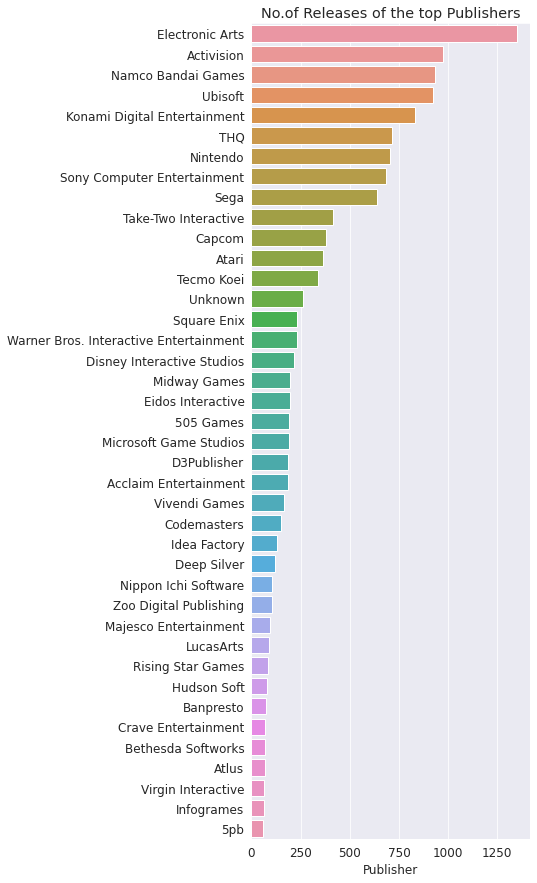

In [45]:
plt.figure(figsize=(5,15))
plt.title("No.of Releases of the top Publishers")
sns.barplot(top_Publishers, top_Publishers.index)

Thus here we can see that the Electronic Arts has the highest releases of games in the past years

In [46]:
vgs4_df= vgs_df[["Name",
                "Global_Sales"]].head(10)
vgs4_df

,Name,Global_Sales
0,Wii Sports,82.74
1,Super Mario Bros.,40.24
2,Mario Kart Wii,35.82
3,Wii Sports Resort,33.00
4,Pokemon Red/Pokemon Blue,31.37
5,Tetris,30.26
6,New Super Mario Bros.,30.01
7,Wii Play,29.02
8,New Super Mario Bros. Wii,28.62
9,Duck Hunt,28.31


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'most sold games'}, xlabel='Name', ylabel='Global_Sales'>

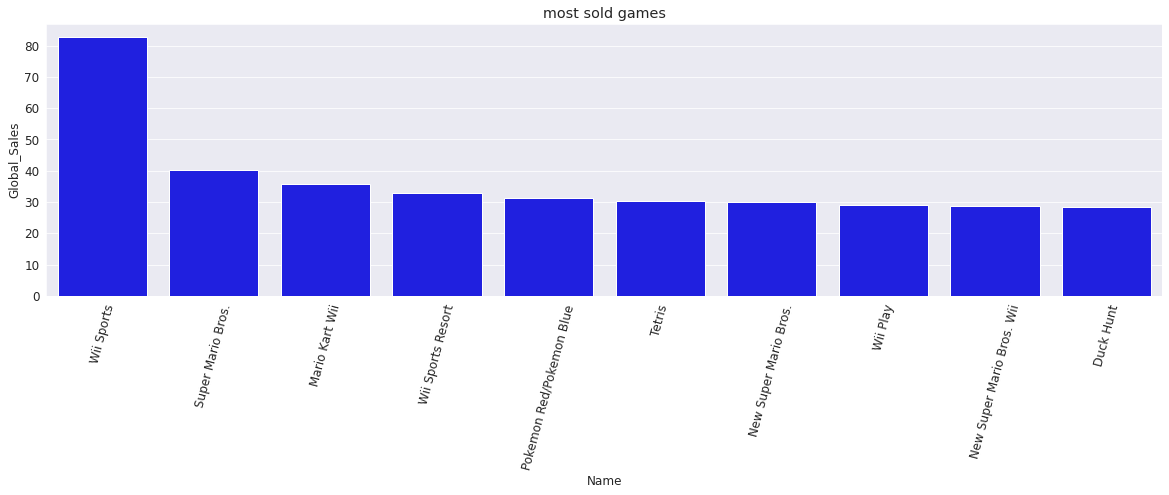

In [47]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=75)
plt.title("most sold games")
plt.xlabel('Name')
plt.ylabel('Sales')
sns.barplot(vgs4_df.Name, vgs4_df.Global_Sales, color='Blue')

Wii sports is the highest sold game in the world throughout the last 40 years

In [48]:
vgs_df.drop(vgs_df[vgs_df.Year == "Unknown"].index, inplace=True)


In [49]:
vgs5_df=vgs_df.copy()

In [50]:
df2=vgs5_df[["Year","Global_Sales"]].head(500)
df2

,Year,Global_Sales
0,2006,82.74
1,1985,40.24
2,2008,35.82
3,2009,33.00
4,1996,31.37
...,...,...
499,2001,2.89
500,2004,2.89
501,2011,2.88
502,1999,2.88


<AxesSubplot:xlabel='Year', ylabel='Global_Sales'>

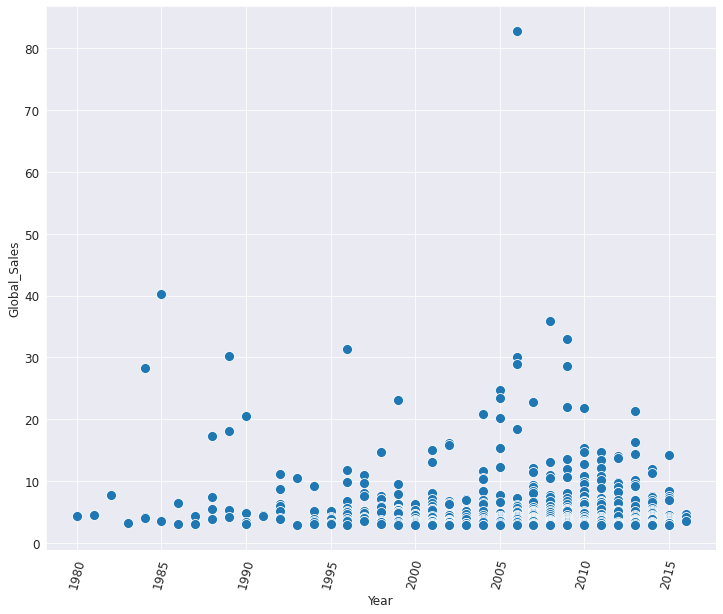

In [51]:
plt.figure(figsize=(12,10))
plt.xticks(rotation=75)
sns.scatterplot(x=df2.Year, y= df2.Global_Sales, s=100)

we can see that the frequency of sales has grown from 1980 to 2020.

##  Comparing the sales in different territories

In [52]:
df3=vgs5_df[["Name",
           'NA_Sales','EU_Sales','JP_Sales','Other_Sales', 'Global_Sales'
           ]]
df4=df3.head(20)

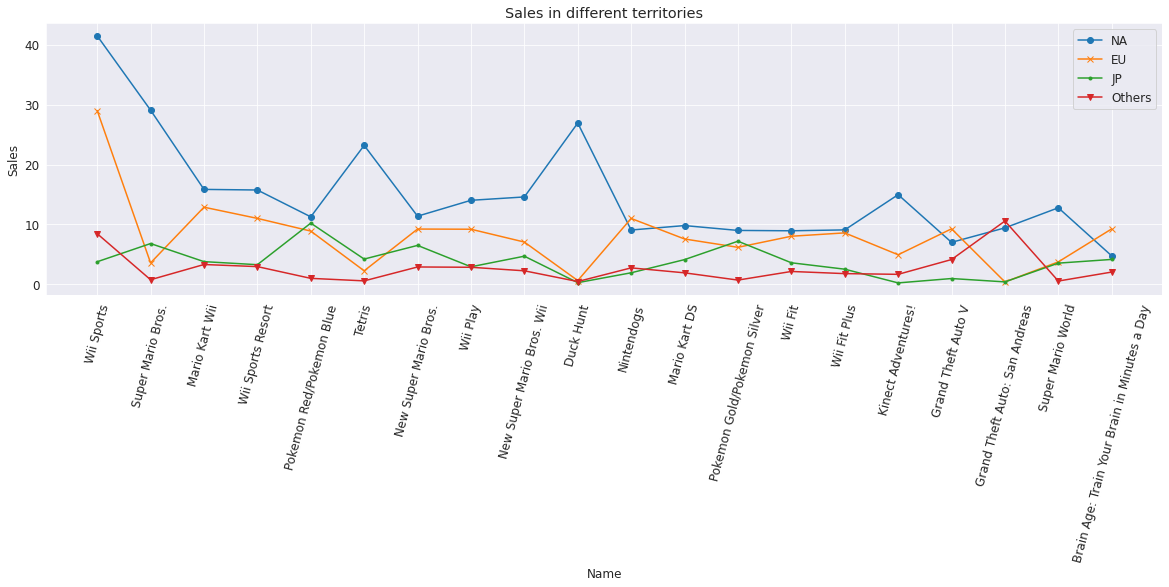

In [53]:
plt.figure(figsize=(20,5))
plt.plot(df4.Name, df4.NA_Sales, marker='o')
plt.plot(df4.Name,df4.EU_Sales , marker='x')
plt.plot(df4.Name,df4.JP_Sales, marker='.')
plt.plot(df4.Name,df4.Other_Sales, marker='v')
plt.xticks(rotation=75)


plt.xlabel('Name')
plt.ylabel('Sales')

plt.title("Sales in different territories")
plt.legend(['NA','EU', 'JP', 'Others'])

## Platform Demand


In [54]:
vgs_df.Platform.nunique()
top_Platforms = vgs_df.Platform.value_counts()
top_Platforms


DS      2133
PS2     2127
PS3     1304
Wii     1290
X360    1235
PSP     1197
PS      1189
PC       943
GBA      811
XB       803
GC       542
3DS      500
PSV      412
PS4      336
N64      316
SNES     239
XOne     213
SAT      173
WiiU     143
2600     116
NES       98
GB        97
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

These are the consoles which people use to play. 

(array([15.,  4.,  2.,  2.,  1.,  3.,  2.,  0.,  0.,  2.]),
 array([1.0000e+00, 2.1420e+02, 4.2740e+02, 6.4060e+02, 8.5380e+02,
        1.0670e+03, 1.2802e+03, 1.4934e+03, 1.7066e+03, 1.9198e+03,
        2.1330e+03]),
 <BarContainer object of 10 artists>)

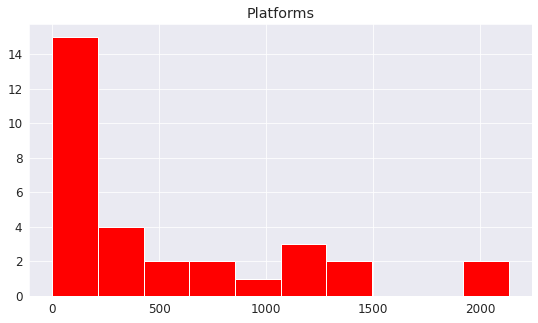

In [55]:

plt.title("Platforms")
plt.hist(top_Platforms, color='r')

This is the histogram of the gaming consoles.

Let us save and upload our work to Jovian before continuing

In [56]:
import jovian

In [57]:
jovian.commit(files=['vgsales.csv'])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sakethgudi/video-game-sales" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/sakethgudi/video-game-sales


'https://jovian.ai/sakethgudi/video-game-sales'

## Asking and Answering Questions





### 1Q)  What is the most favoured Genre by the audience?

In [58]:
vgs_df.drop(vgs_df[vgs_df.Global_Sales==0.00].index, inplace=True)
df4=vgs_df.copy()

In [59]:
df4.Genre.nunique()
top_Genre = df4.Genre.value_counts()
top_Genre

Action          3253
Sports          2304
Misc            1710
Role-Playing    1471
Shooter         1282
Adventure       1276
Racing          1226
Platform         876
Simulation       851
Fighting         836
Strategy         671
Puzzle           571
Name: Genre, dtype: int64

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Genres'}, ylabel='Genre'>

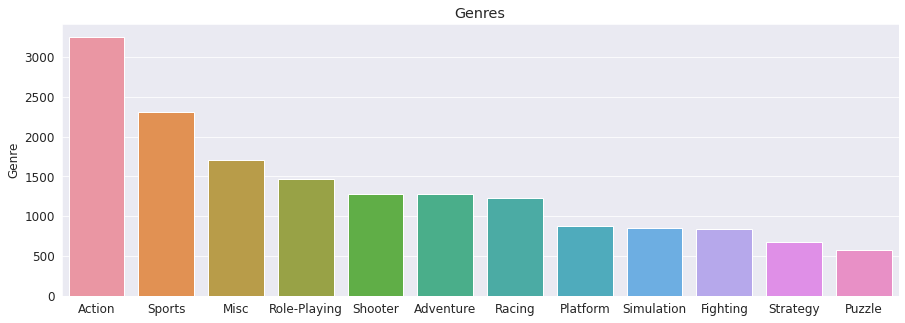

In [60]:
plt.figure(figsize=(15,5))
plt.title("Genres")
sns.barplot(top_Genre.index, top_Genre)

From the stats and the graph above we can see that the audience prefer the Action Genre more than any other Genre. In this question i have used nunique() command which groups the items of a particular column which are same into one. Then i counted by using value_counts() command. Then for the graph i used the sns.barplot command.

## 2Q) At which time where the sales in the peak?

In [61]:
year_stats=df4.groupby('Year')["Global_Sales"].sum()
year_stats

Year
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.16
1993.0     45.98
1994.0     79.17
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.47
1999.0    251.27
2000.0    201.56
2001.0    331.47
2002.0    395.52
2003.0    357.85
2004.0    419.31
2005.0    459.94
2006.0    521.04
2007.0    611.13
2008.0    678.90
2009.0    667.30
2010.0    600.45
2011.0    515.99
2012.0    363.54
2013.0    368.11
2014.0    337.05
2015.0    264.44
2016.0     70.93
2017.0      0.05
2020.0      0.29
Name: Global_Sales, dtype: float64

/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Yearly Sales'}, xlabel='Year', ylabel='Global_Sales'>

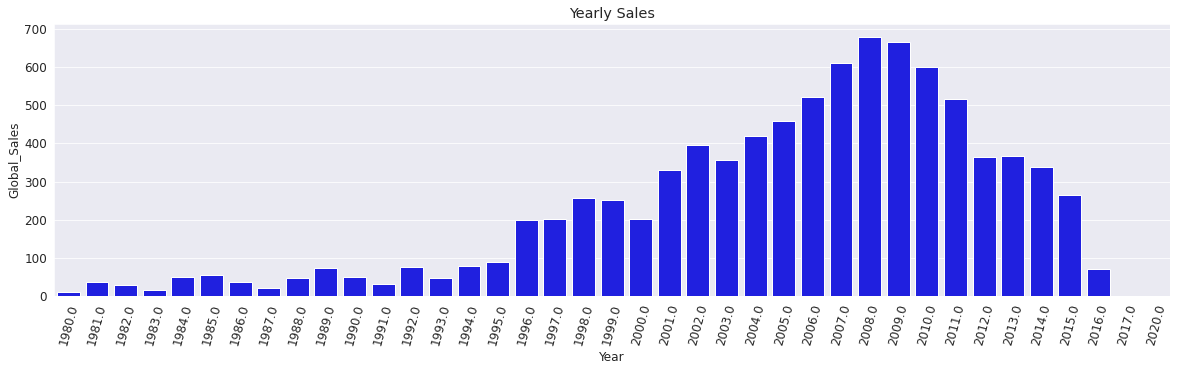

In [62]:
plt.figure(figsize=(20, 5))
plt.xticks(rotation=75)
plt.title("Yearly Sales")
plt.xlabel('Years')
plt.ylabel('Sales')
sns.barplot(year_stats.index,year_stats , color='Blue')

We can see that from the above graph the sales peaked in the years 2008-09. Here I have used matplotlib which helps us to visualise the statistical data. 

## Q3) Which Publisher Have the highest sales?

In [63]:
Publisher_Sales=df4.groupby('Publisher')["Global_Sales"].sum()
Publisher_Sales.sort_values(ascending=False)

Publisher
Nintendo                       1784.43
Electronic Arts                1093.39
Activision                      721.41
Sony Computer Entertainment     607.28
Ubisoft                         473.54
                                ...   
Michaelsoft                       0.01
Media Entertainment               0.01
Takuyo                            0.01
EON Digital Entertainment         0.01
Genterprise                       0.01
Name: Global_Sales, Length: 576, dtype: float64

From the above statistical data we can see that the Nintendo Company had the most sales of all the other in the last 40 years. For finding out the statistics I used the groupby command. Then I sorted the values from max to min using the sort_values command.

## 4Q) In which Territory where there more sales?

In [64]:
a=df4.fraction_sales_from_NA.mean()
b=df4.fraction_sales_from_EU.mean()
c=df4.fraction_sales_from_japan.mean()
d=df4.fraction_sales_from_others.mean()
print(a,b,c,d)

0.45404792718594056 0.22939659920630207 0.24376232009441454 0.06465512355732457


Thus from the above cell we can see that the sales from North America Have the greater fraction of all i.e; 45.4% of the total sales. Therefore the North Ameican sales are more than the others. 

## 5Q) What are the reasons for the growth of sales in time? 

* As shown in the above graph of 'yearly sales' the sales have significantly increased from 1980 to 2020, this has many reasons:
1.) Due to the increase in the technology and the awareness among people about different gaming consoles globally.
2.) As times passed there is increase in the earning of people which made possible the increase in buyers across the world.
3.) The storylines, graphics, sound quality and the overall increase in the strature of the games made people crazy about them. Currently video games are considered on the level of movies.
4.) Gaming has been evolving into a career for many people. This is the trend in the current situation many use the online platforms such as Youtube, Twitch etc. to stream their content.

Let us save and upload our work to Jovian before continuing.

In [65]:
import jovian

In [66]:
jovian.commit(files=["vgsales.csv"])

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sakethgudi/video-game-sales" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/sakethgudi/video-game-sales


'https://jovian.ai/sakethgudi/video-game-sales'

## Inferences 



From this datasheet I could analyse a number of things. The ranking system in the datasheet made it easier toanalyse it. By the graphs i could know the most selling game, most selling Publishers and also most selling Platform. These kind of analysis are better to know before we buy any gaming console. We can have the prior knowledge of the better options so that we can sort out our options easily. 

The Drawback of my analysis could be that I couldnt analyse all the rows as there were so many and the least selling have almost the same no.of sales , it would be too difficult to analyse with the graphs also.

The other thing I inferred was that people's taste in games is also different as in movies, they just dont randomly play the games as above we could see that the Action genre was the highest selling. The sales have also increased as the time passed in the last 40 years.

The sales have been different in different territories the data was a little vague in the least selling games, which could also be rectified.

## Conclusion

I have analysed the Video Game Sales in the last 40 years i.e; 1980-2020. I have done the analysis based on the course knowledge like using the numpy, pandas, matplotlib, seaborns etc. libraries which have proven to be very efficient tools to simplify a dataframe. I could analyse upto my best and I would like to pursue different datasets in the future.  

In [69]:
import jovian

In [70]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "sakethgudi/video-game-sales" on https://jovian.ai
[jovian] Uploading notebook..
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/sakethgudi/video-game-sales


'https://jovian.ai/sakethgudi/video-game-sales'

## References 



> Submission Instructions (delete this cell)
> 
> - Upload your notebook to your Jovian.ml profile using `jovian.commit`.
> - **Make a submission here**: https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas/assignment/course-project
> - Share your work on the forum: https://jovian.ml/forum/t/course-project-on-exploratory-data-analysis-discuss-and-share-your-work/11684
> - Share your work on social media (Twitter, LinkedIn, Telegram etc.) and tag [@JovianML](https://twitter.com/jovianml)
>
> (Optional) Write a blog post
> 
> - A blog post is a great way to present and showcase your work.  
> - Sign up on [Medium.com](https://medium.com) to write a blog post for your project.
> - Copy over the explanations from your Jupyter notebook into your blog post, and [embed code cells & outputs](https://medium.com/jovianml/share-and-embed-jupyter-notebooks-online-with-jovian-ml-df709a03064e)
> - Check out the Jovian.ml Medium publication for inspiration: https://medium.com/jovianml


 

* https://jovian.ai/learn/data-analysis-with-python-zero-to-pandas
* https://jovian.ai/aakashns/python-numerical-computing-with-numpy
* https://jovian.ai/aakashns/python-pandas-data-analysis
* https://jovian.ai/aakashns/python-matplotlib-data-visualization
* https://jovian.ai/aakashns/python-eda-stackoverflow-survey
* https://www.kaggle.com/gregorut/videogamesales?select=vgsales.csv

## Future Work

There is plenty of analysing to be done in my datasheet and I want to try all the different codes in the libraries to analyse more effectively. 

In [32]:
import jovian

In [35]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Attempting to save notebook..
[jovian] Updating notebook "aakashns/zerotopandas-course-project-starter" on https://jovian.ml/
[jovian] Uploading notebook..
[jovian] Capturing environment..
[jovian] Committed successfully! https://jovian.ml/aakashns/zerotopandas-course-project-starter


'https://jovian.ml/aakashns/zerotopandas-course-project-starter'